# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
from scipy.stats import linregress
from matplotlib.dates import DateFormatter

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

593

## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# Initiate Count
record_number = 0

# Set up lists to hold reponse info in dataframe
name_city = []
cloudiness = []
country = []
date = []
humidity = []
latitude = []
longitude = []
max_temp = []
wind_speed = []

# Print Header
print(f"Beginning Data Retrieval")
print(f"-----------------------------------------")

# Loop through the list of cities
for city in cities:    
    
    # Create search query, make request and store in json with a 2 second timer for pausing to avoid temporarily blocking my OpenWeatherMap API key
    weather_response = requests.get(query_url + str(city))
    weather_response_json = weather_response.json()
    time.sleep(2)   
    
    # Try to retrieve and store weather conditions into lists and if a random city is not found in the Open Weathermap then skip 
    try:
        name_city.append(weather_response_json["name"])
        country.append(weather_response_json["sys"]["country"])
        date.append(weather_response_json["dt"])
        latitude.append(weather_response_json["coord"]["lat"])
        longitude.append(weather_response_json["coord"]["lon"])
        cloudiness.append(weather_response_json["clouds"]["all"])
        humidity.append(weather_response_json["main"]["humidity"])
        max_temp.append(weather_response_json["main"]["temp_max"])
        wind_speed.append(weather_response_json["wind"]["speed"])
                   
        print(f"Processing Record {record_number} | {city}")
        record_number += 1
               
    except:
        # Append null values
        print("City not found. Skipping...")

print(f"-----------------------------------------")
print(f"Data Retrieval Complete")

Beginning Data Retrieval
-----------------------------------------
Processing Record 0 | chuy
Processing Record 1 | bhatkal
Processing Record 2 | pangai
Processing Record 3 | camacha
Processing Record 4 | lompoc
Processing Record 5 | ribeira grande
City not found. Skipping...
Processing Record 6 | hasaki
Processing Record 7 | atuona
Processing Record 8 | sangar
Processing Record 9 | cape town
Processing Record 10 | nanakuli
Processing Record 11 | karratha
Processing Record 12 | hilo
Processing Record 13 | seoul
Processing Record 14 | mataura
Processing Record 15 | pisco
Processing Record 16 | saint-joseph
Processing Record 17 | ola
Processing Record 18 | ust-uda
Processing Record 19 | polson
Processing Record 20 | rikitea
Processing Record 21 | albany
City not found. Skipping...
Processing Record 22 | praya
Processing Record 23 | hermanus
Processing Record 24 | katobu
Processing Record 25 | deputatskiy
Processing Record 26 | shupiyan
Processing Record 27 | east london
Processing Record

Processing Record 230 | mayskiy
Processing Record 231 | tambacounda
Processing Record 232 | constitucion
Processing Record 233 | hokitika
Processing Record 234 | bam
Processing Record 235 | la asuncion
Processing Record 236 | ariquemes
Processing Record 237 | zhaotong
Processing Record 238 | kovdor
Processing Record 239 | lake charles
Processing Record 240 | sesheke
Processing Record 241 | evensk
Processing Record 242 | huejuquilla el alto
Processing Record 243 | bowen
Processing Record 244 | lavrentiya
Processing Record 245 | taos
Processing Record 246 | naron
Processing Record 247 | carnarvon
Processing Record 248 | sobolevo
Processing Record 249 | verkhnyaya inta
Processing Record 250 | sisimiut
Processing Record 251 | luganville
Processing Record 252 | north battleford
Processing Record 253 | umm lajj
Processing Record 254 | ahipara
Processing Record 255 | yangambi
Processing Record 256 | havelock
Processing Record 257 | meadow lake
City not found. Skipping...
Processing Record 258

Processing Record 463 | kaseda
Processing Record 464 | waingapu
Processing Record 465 | yelizovo
Processing Record 466 | chuguyevka
Processing Record 467 | dondo
City not found. Skipping...
Processing Record 468 | lumsden
Processing Record 469 | hambantota
Processing Record 470 | balkanabat
Processing Record 471 | masinigudi
Processing Record 472 | guilin
Processing Record 473 | tailai
Processing Record 474 | cabedelo
Processing Record 475 | bama
Processing Record 476 | alta floresta
Processing Record 477 | muros
Processing Record 478 | ucluelet
Processing Record 479 | tilichiki
Processing Record 480 | mahanoro
Processing Record 481 | kisangani
Processing Record 482 | sao miguel do araguaia
Processing Record 483 | camopi
Processing Record 484 | rovaniemi
Processing Record 485 | saint-andre-avellin
Processing Record 486 | flin flon
Processing Record 487 | aden
Processing Record 488 | kulhudhuffushi
Processing Record 489 | maceio
City not found. Skipping...
Processing Record 490 | gayeri

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a dictionary and then place into a data frame from lists defined above

weather_dictionary = {"City": name_city,
                      "Country": country,
                      "Date": date,
                      "Latitude": latitude,
                      "Longitude": longitude,
                      "Cloudiness (%)": cloudiness,
                      "Humidity (%)": humidity,
                      "Max Temp (F)": max_temp,
                      "Wind Speed (mph)": wind_speed}

weather_data = pd.DataFrame(weather_dictionary)
weather_data["Date"] = pd.to_datetime(weather_data["Date"],unit='s')
weather_data.to_csv("weather_data_output.csv")
weather_data

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,Chui,UY,2020-03-15 23:40:37,-33.70,-53.46,100,71,64.00,6.35
1,Bhatkal,IN,2020-03-15 23:40:39,13.97,74.57,9,75,76.05,6.11
2,Pangai,TO,2020-03-15 23:40:41,-19.80,-174.35,90,79,84.20,8.05
3,Camacha,PT,2020-03-15 23:40:43,33.08,-16.33,40,72,62.60,13.87
4,Lompoc,US,2020-03-15 23:41:06,34.64,-120.46,90,81,57.20,10.29
...,...,...,...,...,...,...,...,...,...
542,Leer,SS,2020-03-16 00:01:56,8.30,30.14,35,23,78.12,2.15
543,Tonantins,BR,2020-03-16 00:01:58,-2.87,-67.80,70,92,77.31,2.35
544,Doksy,CZ,2020-03-16 00:02:01,50.56,14.66,42,60,39.00,6.93
545,Medeiros Neto,BR,2020-03-16 00:02:03,-17.37,-40.22,89,91,72.81,3.47


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

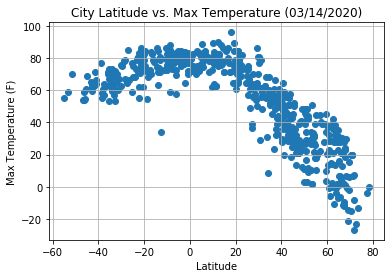

In [5]:
# Build a scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Max Temp (F)"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (03/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("Fig. 01 (Latitude vs. Temperature).png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

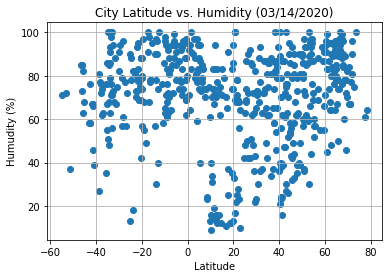

In [6]:
# Build a scatter plot 
plt.scatter(weather_data["Latitude"], weather_data["Humidity (%)"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (03/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humudity (%)")
plt.grid(True)

# Save the figure
plt.savefig("Fig. 02 (Latitude vs. Humidity).png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

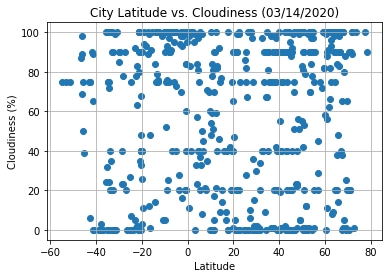

In [7]:
# Build a scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness (%)"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (03/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("Fig. 03 (Latitude vs. Cloudiness).png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

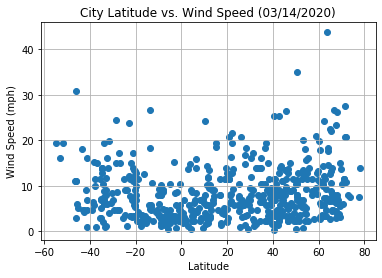

In [8]:
# Build a scatter plot
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed (mph)"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (03/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("Fig. 04 (Latitude vs. Wind Speed).png")

# Show plot
plt.show()

## Linear Regression

In [9]:
# OPTIONAL: Create a function to create Linear Regression plots


In [10]:
# Create Northern and Southern Hemisphere DataFrames

# Define variables to determine cities above and below the equator
northern_cities = weather_data["Latitude"] >= 0
southern_cities = weather_data["Latitude"] < 0

# Place the variables from above into DataFrames 
northern_weather = weather_data[northern_cities]
southern_weather = weather_data[southern_cities]

# Reset the index for each DataFrame
northern_weather = northern_weather.reset_index(drop=True)
southern_weather = southern_weather.reset_index(drop=True)
southern_weather.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,Chui,UY,2020-03-15 23:40:37,-33.70,-53.46,100,71,64.00,6.35
1,Pangai,TO,2020-03-15 23:40:41,-19.80,-174.35,90,79,84.20,8.05
2,Atuona,PF,2020-03-15 23:41:15,-9.80,-139.03,5,65,82.42,9.31
3,Cape Town,ZA,2020-03-15 23:41:18,-33.93,18.42,20,63,64.40,19.46
4,Karratha,AU,2020-03-15 23:41:23,-20.74,116.85,0,75,84.09,13.51


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The Correlation (R) between Latitude and Max Temperature (F) is: -0.89


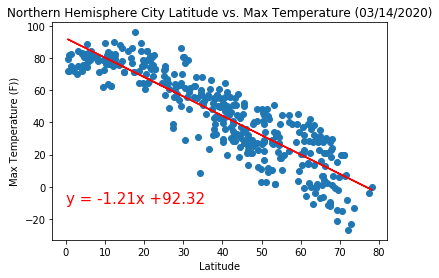

In [20]:
# Calculate the correlation coefficient and linear regression model for latitude and Temperature

# Define x-values by Latitude and y-values by Temperature into lists
x_values = northern_weather["Latitude"]
y_values = northern_weather["Max Temp (F)"]

# Perform a linear regression on latitude vs.Temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Hemisphere City Latitude vs. Max Temperature (03/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F))")
plt.annotate(line_eq,(0,-10),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Latitude and Max Temperature (F) is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 05 (Northern Latitude vs. Temperature).png")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The Correlation (R) between Latitude and Max Temperature (F) is: 0.62


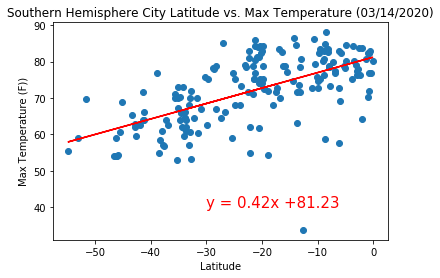

In [21]:
# Calculate the correlation coefficient and linear regression model for latitude and Temperature

# Define x-values by Latitude and y-values by Temperature into lists
x_values = southern_weather["Latitude"]
y_values = southern_weather["Max Temp (F)"]

# Perform a linear regression on latitude vs.Temperature
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Hemisphere City Latitude vs. Max Temperature (03/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F))")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Latitude and Max Temperature (F) is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 06 (Southern Latitude vs. Temperature).png")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The Correlation (R) between Latitude and Humidity is: 0.25


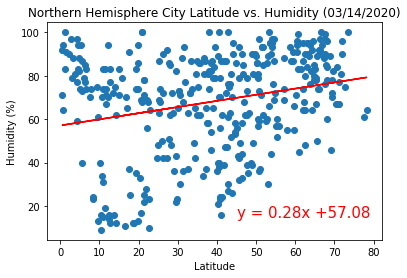

In [22]:
# Calculate the correlation coefficient and linear regression model for latitude and Humidity

# Define x-values by Latitude and y-values by Humidity into lists
x_values = northern_weather["Latitude"]
y_values = northern_weather["Humidity (%)"]

# Perform a linear regression on latitude vs.Humidity
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Hemisphere City Latitude vs. Humidity (03/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(45,15),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Latitude and Humidity is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 07 (Northern Latitude vs. Humidity).png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The Correlation (R) between Latitude and Humidity is: 0.28


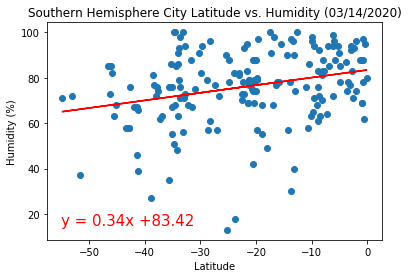

In [24]:
# Calculate the correlation coefficient and linear regression model for latitude and Humidity

# Define x-values by Latitude and y-values by Humidity into lists
x_values = southern_weather["Latitude"]
y_values = southern_weather["Humidity (%)"]

# Perform a linear regression on latitude vs.Humidity
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Hemisphere City Latitude vs. Humidity (03/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Latitude and Humidity is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 08 (Southern Latitude vs. Humidity).png")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The Correlation (R) between Latitude and Cloudiness is: 0.13


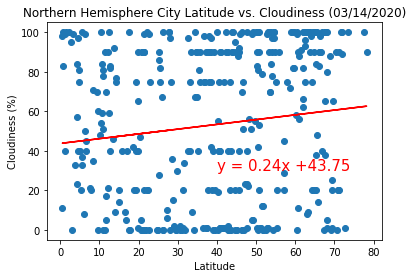

In [25]:
# Calculate the correlation coefficient and linear regression model for latitude and Cloudiness

# Define x-values by Latitude and y-values by Cloudiness into lists
x_values = northern_weather["Latitude"]
y_values = northern_weather["Cloudiness (%)"]

# Perform a linear regression on latitude vs.Cloudiness
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Hemisphere City Latitude vs. Cloudiness (03/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Latitude and Cloudiness is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 09 (Northern Latitude vs. Cloudiness).png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The Correlation (R) between Latitude and Cloudiness is: 0.22


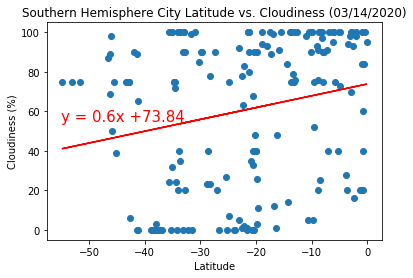

In [26]:
# Calculate the correlation coefficient and linear regression model for latitude and Cloudiness

# Define x-values by Latitude and y-values by Cloudiness into lists
x_values = southern_weather["Latitude"]
y_values = southern_weather["Cloudiness (%)"]

# Perform a linear regression on latitude vs.Cloudiness
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Hemisphere City Latitude vs. Cloudiness (03/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.annotate(line_eq,(-55,55),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Latitude and Cloudiness is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 10 (Southern Latitude vs. Cloudiness).png")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The Correlation (R) between Latitude and Wind Speed is: 0.21


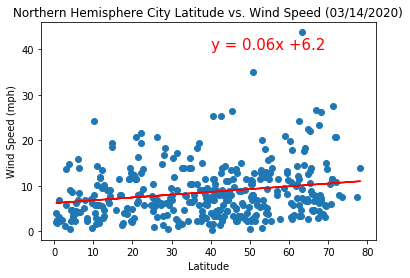

In [27]:
# Calculate the correlation coefficient and linear regression model for latitude and Wind Speed

# Define x-values by Latitude and y-values by Wind Speed into lists
x_values = northern_weather["Latitude"]
y_values = northern_weather["Wind Speed (mph)"]

# Perform a linear regression on latitude vs. Wind Speed
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Hemisphere City Latitude vs. Wind Speed (03/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq,(40,40),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Latitude and Wind Speed is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 11 (Northern Latitude vs. Wind Speed).png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The Correlation (R) between Latitude and Wind Speed is: -0.37


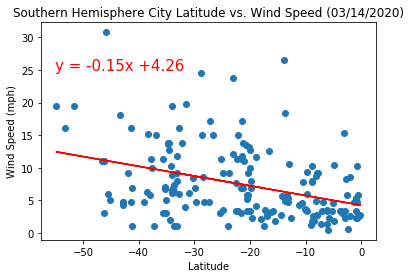

In [31]:
# Calculate the correlation coefficient and linear regression model for latitude and Wind Speed

# Define x-values by Latitude and y-values by Wind Speed into lists
x_values = southern_weather["Latitude"]
y_values = southern_weather["Wind Speed (mph)"]

# Perform a linear regression on latitude vs. Wind Speed
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create a Scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Hemisphere City Latitude vs. Wind Speed (03/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")

# Print r value
print(f"The Correlation (R) between Latitude and Wind Speed is: {round(rvalue,2)}")

# Save the figure
plt.savefig("Fig. 12 (Southern Latitude vs. Wind Speed).png")

# Show plot
plt.show()